In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.impute import KNNImputer
import missingno as msno

# data_test = pd.read_csv("test.csv")
data = pd.read_csv("train.csv")

# 选择第37到45列
df_selected = data.iloc[:,  [0] + list(range(45, 54))]
df_selected.head()
df_selected.info()

# # test
# df_selected_test = data_test.iloc[:,  [0] + list(range(46, 54))]
# df_selected_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6495 entries, 0 to 6494
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_id            6495 non-null   int64  
 1   reviews_rating         5112 non-null   float64
 2   reviews_acc            5096 non-null   float64
 3   reviews_cleanliness    5098 non-null   float64
 4   reviews_checkin        5094 non-null   float64
 5   reviews_communication  5099 non-null   float64
 6   reviews_location       5092 non-null   float64
 7   reviews_value          5090 non-null   float64
 8   reviews_per_month      5205 non-null   float64
 9   extra                  6490 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 507.5+ KB


<Axes: >

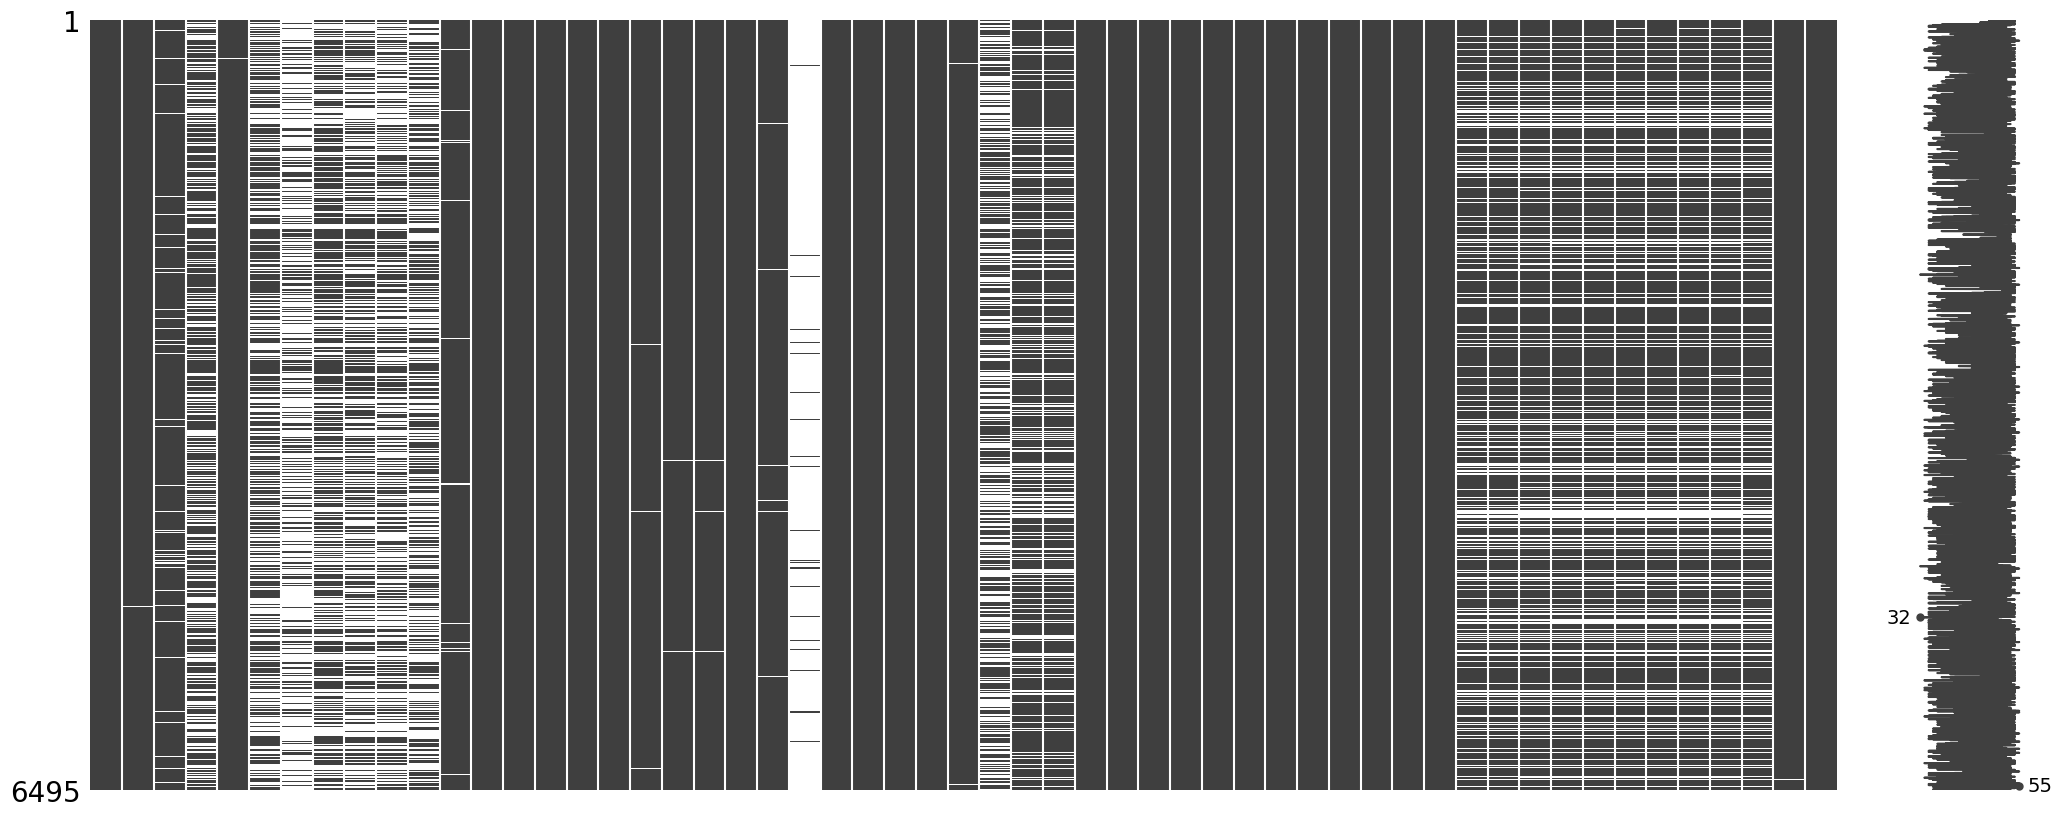

In [ ]:
import missingno as msno
msno.matrix(data)

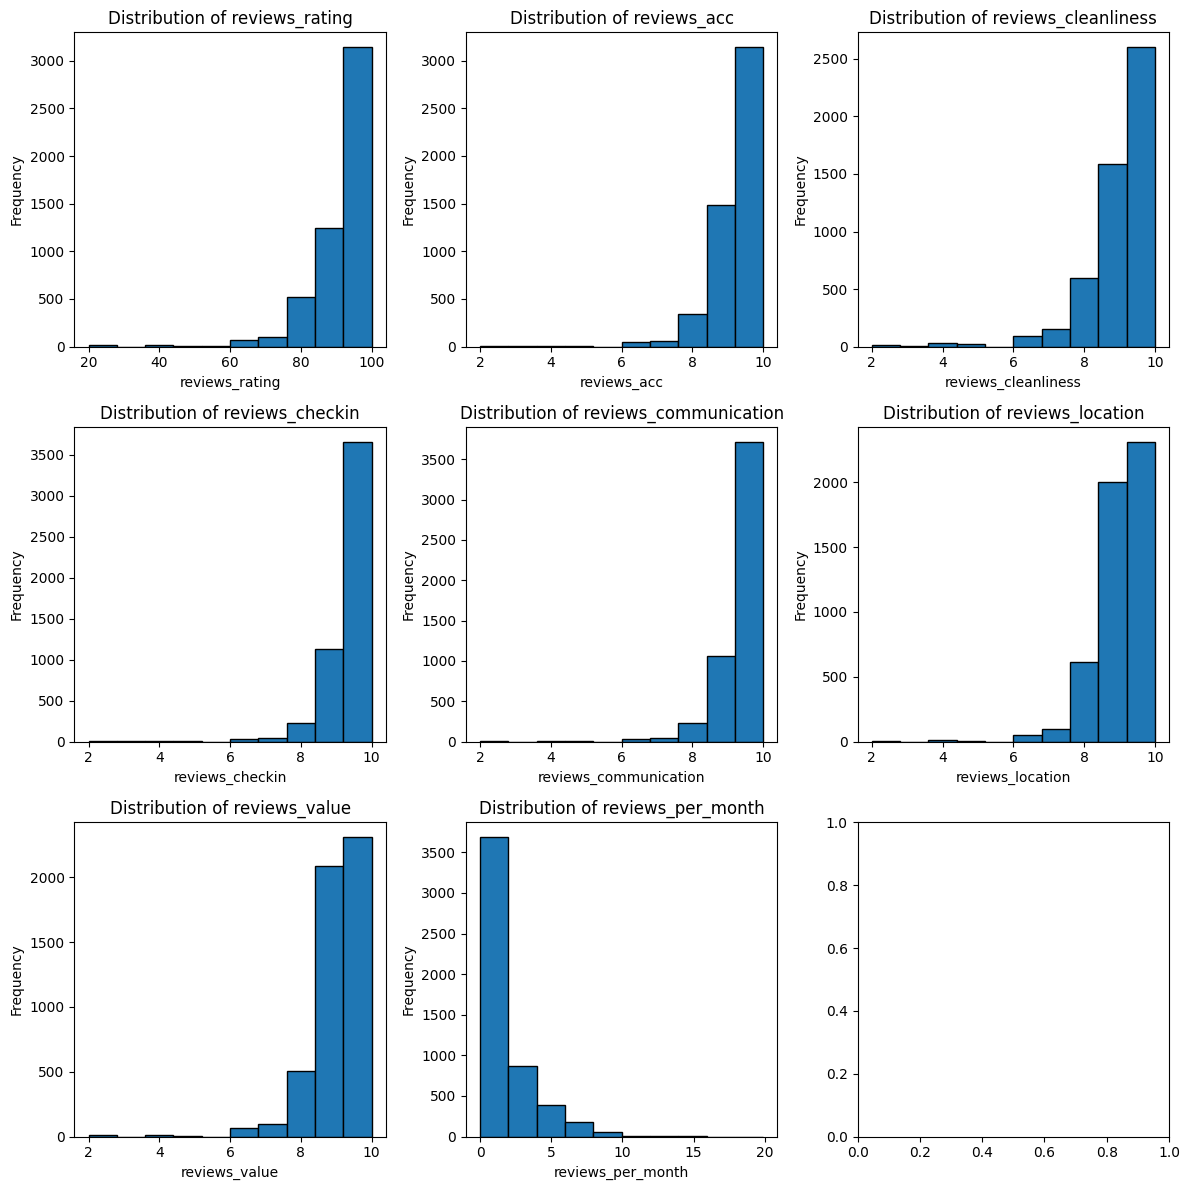

In [ ]:
# 將所有變數放入一個列表中
variables = [df_selected['reviews_rating'], df_selected['reviews_acc'], df_selected['reviews_cleanliness'], df_selected['reviews_checkin'], df_selected['reviews_communication'], df_selected['reviews_location'], df_selected['reviews_value'], df_selected['reviews_per_month']]
review_df = df_selected[['reviews_rating','reviews_acc','reviews_cleanliness','reviews_checkin','reviews_communication','reviews_location','reviews_value','reviews_per_month']]
# 將所有變數放入一個列表中
var_names = ['reviews_rating', "reviews_acc", "reviews_cleanliness", "reviews_checkin", "reviews_communication", "reviews_location", "reviews_value", "reviews_per_month"]

# 創建3行3列的子圖佈局
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

# 迴圈遍歷每個變數並繪製直方圖
for i, var in enumerate(variables):
    if i < 8:  # 避免繪製最後兩個圖表
        row = i // 3  # 目前所在的行
        col = i % 3   # 目前所在的列
        axs[row, col].hist(var, bins=10, edgecolor='black')
        axs[row, col].set_xlabel(var_names[i])  # 使用變數名稱作為x軸標籤
        axs[row, col].set_ylabel('Frequency')
        axs[row, col].set_title('Distribution of {}'.format(var_names[i]))


# 調整子圖間的間距
plt.tight_layout()

# 顯示圖形
plt.show()

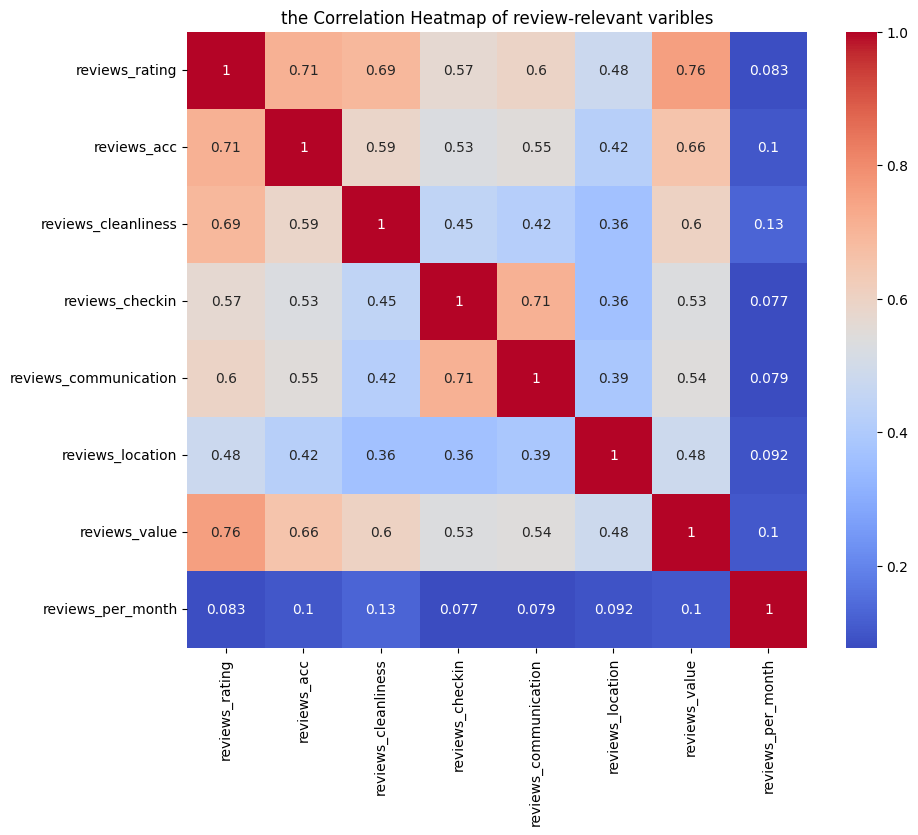

In [ ]:
# 計算變數之間的相關係數
correlation_matrix = review_df.corr()

# 繪製相關係數熱度圖
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('the Correlation Heatmap of review-relevant varibles')
plt.show()

In [ ]:
# 用KNN填補review相關變數的缺失值；用'None'填補Extra的缺失值
for column in range(1,8):
  # 初始化 KNNImputer 物件
  imputer = KNNImputer(n_neighbors=3)

  # 將 DataFrame 物件的第 1 欄轉換為 NumPy 陣列
  col = df_selected.iloc[:, column].values.reshape(-1, 1)
  col_test = df_selected_test.iloc[:, column].values.reshape(-1, 1)

  # 使用 KNN 方法填補缺失值
  col_imputer = imputer.fit(col)
  col_imputed_test = col_imputer.transform(col_test)

  # 將填補後的資料放回 DataFrame 物件
  df_selected_test.iloc[:, column] = col_imputed_test

df_selected_test["extra"].fillna('None', inplace=True)
df_selected.isnull().sum()
df_selected_test.info()

<ipython-input-51-2929ea8fe3f6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_test.iloc[:, column] = col_imputed_test
<ipython-input-51-2929ea8fe3f6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_test.iloc[:, column] = col_imputed_test
<ipython-input-51-2929ea8fe3f6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_id            919 non-null    int64  
 1   reviews_acc            919 non-null    float64
 2   reviews_cleanliness    919 non-null    float64
 3   reviews_checkin        919 non-null    float64
 4   reviews_communication  919 non-null    float64
 5   reviews_location       919 non-null    float64
 6   reviews_value          919 non-null    float64
 7   reviews_per_month      919 non-null    float64
 8   extra                  919 non-null    object 
dtypes: float64(7), int64(1), object(1)
memory usage: 64.7+ KB


<ipython-input-51-2929ea8fe3f6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_test.iloc[:, column] = col_imputed_test
<ipython-input-51-2929ea8fe3f6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_test["extra"].fillna('None', inplace=True)


In [ ]:
df_selected_test['Host Is Superhost'] = df_selected_test['extra'].str.contains('Host Is Superhost')
df_selected_test['Host Has Profile Pic'] = df_selected_test['extra'].str.contains('Host Has Profile Pic')
df_selected_test['Host Identity Verified'] = df_selected_test['extra'].str.contains('Host Identity Verified')
df_selected_test['Is Location Exact'] = df_selected_test['extra'].str.contains('Is Location Exact')
df_selected_test['Instant Bookable'] = df_selected_test['extra'].str.contains('Instant Bookable')
df_selected_test['Require Guest Profile Picture'] = df_selected_test['extra'].str.contains('Require Guest Profile Picture')
df_selected_test['Require Guest Phone Verification'] = df_selected_test['extra'].str.contains('Require Guest Phone Verification')
df_selected_test['None'] = df_selected_test['extra'].str.contains('None')

df_selected_test = df_selected_test.drop('extra', axis=1)
print(df_selected_test.head())

df_selected_test.to_csv('ashley_test_output_file.csv', index=False)

   property_id  reviews_acc  reviews_cleanliness  reviews_checkin  \
0         6501     9.000000             9.000000         9.000000   
1         6502     9.469388             9.211652         9.608952   
2         6503     9.000000             7.000000         9.000000   
3         6504     9.000000             9.000000         9.000000   
4         6505     9.469388             9.211652         9.608952   

   reviews_communication  reviews_location  reviews_value  reviews_per_month  \
0              10.000000          9.000000       9.000000           9.260000   
1               9.621298          9.241359       9.246169           1.667712   
2               9.000000          8.000000       9.000000           0.150000   
3              10.000000          8.000000       9.000000           4.040000   
4               9.621298          9.241359       9.246169           1.667712   

   Host Is Superhost  Host Has Profile Pic  Host Identity Verified  \
0              False              

<ipython-input-52-7119c92b7ce1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_test['Host Is Superhost'] = df_selected_test['extra'].str.contains('Host Is Superhost')
<ipython-input-52-7119c92b7ce1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_test['Host Has Profile Pic'] = df_selected_test['extra'].str.contains('Host Has Profile Pic')
<ipython-input-52-7119c92b7ce1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro